In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
from citipy import citipy



In [5]:
#Create a list for holding the cities
cities = []

#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count
len(cities)

592

In [6]:
#Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cef4d295035c02fd6d29329bac262b7b


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
#Create an empty list to hold the weather data
city_data = []

#Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 toS the record count
    record_count += 1

    ### Code Breakdown ###
    #Create a for loop with the enumerate() method and reference the index and the city in the list
    #Check if the remainder of the index divided by 50 is equal to zero, AND if the index is greater than or equal to 50,
    # using a conditional statement.
    #Create a URL endpoint in the conditional statement. However, we are removing blank spaces in the city name and 
    # concatenating the city name using city.replace(" ","+"). This will find the corresponding weather data for the city
    # instead of finding the weather data for the first part of the city name.
    #Add a print statement that tells the record count, set count, and the city that is being processed
    #Then add 1 to the record count before the next city is processed

#Run an API request for each of the cites 
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list
        city_data.append({'City': city.title(),
                          'Lat': city_lat, 
                          'Lng': city_lng, 
                          'Max Temp': city_max_temp, 
                          'Humidity': city_humidity, 
                          'Cloudiness': city_clouds, 
                          'Wind Speed': city_wind, 
                          'Country': city_country, 
                          'Date': city_date})
#If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#Indicate that the Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | lasa
Processing Record 3 of Set 1 | karaul
City not found. Skipping...
Processing Record 4 of Set 1 | chuy
Processing Record 5 of Set 1 | general roca
Processing Record 6 of Set 1 | okhotsk
Processing Record 7 of Set 1 | ulladulla
Processing Record 8 of Set 1 | saint-philippe
Processing Record 9 of Set 1 | dikson
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | tanete
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | portland
Processing Record 18 of Set 1 | zile
Processing Record 19 of Set 1 | tura
Processing Record 20 of Set 1 | ketchikan
Processing Record 21 of Set 1 | axim
Processing Record 22 of Set 1 | upernavik
Processing Record 23 of Set 1 | poum
Process

Processing Record 39 of Set 4 | melito di porto salvo
Processing Record 40 of Set 4 | manoel urbano
Processing Record 41 of Set 4 | buchanan
Processing Record 42 of Set 4 | tazovskiy
Processing Record 43 of Set 4 | takhtamygda
Processing Record 44 of Set 4 | alyangula
Processing Record 45 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 46 of Set 4 | san patricio
Processing Record 47 of Set 4 | kanniyakumari
Processing Record 48 of Set 4 | quirinopolis
Processing Record 49 of Set 4 | litovko
Processing Record 50 of Set 4 | carutapera
Processing Record 1 of Set 5 | altay
Processing Record 2 of Set 5 | wahiawa
Processing Record 3 of Set 5 | constitucion
Processing Record 4 of Set 5 | tual
Processing Record 5 of Set 5 | alice springs
Processing Record 6 of Set 5 | port lincoln
Processing Record 7 of Set 5 | isangel
Processing Record 8 of Set 5 | ahipara
Processing Record 9 of Set 5 | talnakh
Processing Record 10 of Set 5 | buritis
Processing Record 11 of Set 5 | kovur
Pr

Processing Record 24 of Set 8 | dwarka
Processing Record 25 of Set 8 | flin flon
Processing Record 26 of Set 8 | kawalu
Processing Record 27 of Set 8 | honavar
Processing Record 28 of Set 8 | kortkeros
Processing Record 29 of Set 8 | urdoma
Processing Record 30 of Set 8 | bengkulu
Processing Record 31 of Set 8 | morant bay
Processing Record 32 of Set 8 | jepara
Processing Record 33 of Set 8 | newport
Processing Record 34 of Set 8 | porangatu
Processing Record 35 of Set 8 | khristoforovo
City not found. Skipping...
Processing Record 36 of Set 8 | vardo
Processing Record 37 of Set 8 | alofi
Processing Record 38 of Set 8 | hamina
Processing Record 39 of Set 8 | acajutla
Processing Record 40 of Set 8 | longlac
City not found. Skipping...
Processing Record 41 of Set 8 | carcassonne
Processing Record 42 of Set 8 | balkanabat
Processing Record 43 of Set 8 | lumby
Processing Record 44 of Set 8 | miri
Processing Record 45 of Set 8 | lata
Processing Record 46 of Set 8 | konakovo
Processing Recor

City not found. Skipping...
Processing Record 14 of Set 12 | tutoia
Processing Record 15 of Set 12 | barra do garcas
Processing Record 16 of Set 12 | mirnyy
Processing Record 17 of Set 12 | shu
Processing Record 18 of Set 12 | murray bridge
Processing Record 19 of Set 12 | rolla
Processing Record 20 of Set 12 | dzhebariki-khaya
Processing Record 21 of Set 12 | rocha
Processing Record 22 of Set 12 | tyup
Processing Record 23 of Set 12 | comodoro rivadavia
Processing Record 24 of Set 12 | skalistyy
City not found. Skipping...
Processing Record 25 of Set 12 | grand centre
City not found. Skipping...
Processing Record 26 of Set 12 | aasiaat
Processing Record 27 of Set 12 | maun
Processing Record 28 of Set 12 | turgutlu
Processing Record 29 of Set 12 | nampa
Processing Record 30 of Set 12 | saryozek
Processing Record 31 of Set 12 | sorland
Processing Record 32 of Set 12 | camacha
Processing Record 33 of Set 12 | verpelet
Processing Record 34 of Set 12 | young
Processing Record 35 of Set 12 

In [10]:
len(city_data)

546

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,79.12,79,90,1.99,US,2021-11-23 07:23:29
1,Lasa,46.6166,10.7002,40.08,85,48,2.28,IT,2021-11-23 07:23:30
2,Chuy,-33.6971,-53.4616,60.71,68,3,14.45,UY,2021-11-23 07:23:30
3,General Roca,-39.0333,-67.5833,57.61,30,0,7.81,AR,2021-11-23 07:23:31
4,Okhotsk,59.3833,143.3000,4.75,88,23,11.61,RU,2021-11-23 07:23:31
5,Ulladulla,-35.3500,150.4667,70.77,77,100,9.86,AU,2021-11-23 07:23:31
6,Saint-Philippe,-21.3585,55.7679,83.75,63,5,9.98,RE,2021-11-23 07:23:32
7,Dikson,73.5069,80.5464,-7.24,96,100,18.21,RU,2021-11-23 07:19:34
8,Bredasdorp,-34.5322,20.0403,67.32,52,40,8.05,ZA,2021-11-23 07:23:32
9,Bethel,41.3712,-73.4140,35.04,65,1,5.75,US,2021-11-23 07:23:33


In [17]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2021-11-23 07:23:29,22.0752,-159.3190,79.12,79,90,1.99
1,Lasa,IT,2021-11-23 07:23:30,46.6166,10.7002,40.08,85,48,2.28
2,Chuy,UY,2021-11-23 07:23:30,-33.6971,-53.4616,60.71,68,3,14.45
3,General Roca,AR,2021-11-23 07:23:31,-39.0333,-67.5833,57.61,30,0,7.81
4,Okhotsk,RU,2021-11-23 07:23:31,59.3833,143.3000,4.75,88,23,11.61
5,Ulladulla,AU,2021-11-23 07:23:31,-35.3500,150.4667,70.77,77,100,9.86
6,Saint-Philippe,RE,2021-11-23 07:23:32,-21.3585,55.7679,83.75,63,5,9.98
7,Dikson,RU,2021-11-23 07:19:34,73.5069,80.5464,-7.24,96,100,18.21
8,Bredasdorp,ZA,2021-11-23 07:23:32,-34.5322,20.0403,67.32,52,40,8.05
9,Bethel,US,2021-11-23 07:23:33,41.3712,-73.4140,35.04,65,1,5.75


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

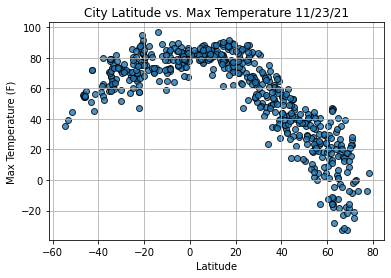

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

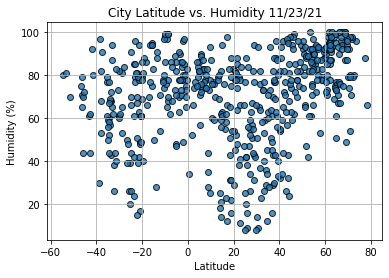

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

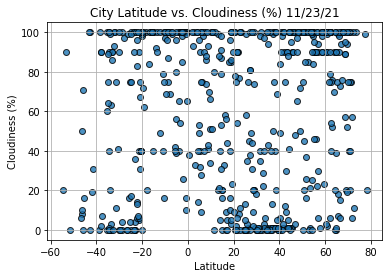

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

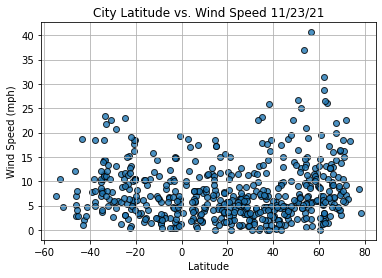

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()